In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install mlflow

In [3]:
df  = pd.read_csv(r"/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [4]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [6]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [7]:
df.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


(array([  965.,     0.,   616.,     0.,     0.,  1206.,     0.,  5648.,
            0., 19897.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

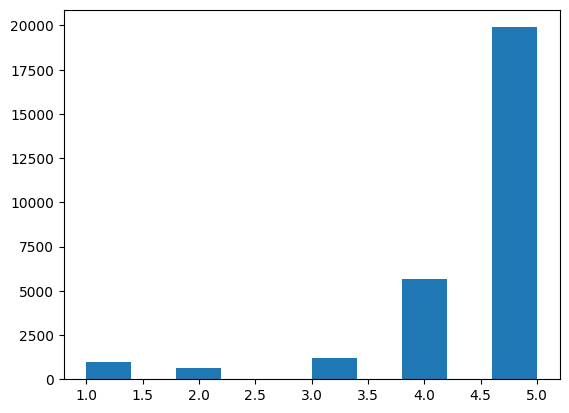

In [8]:
plt.hist(df["reviews.rating"])

We can see more products are rated 5 stars than rest and there is extreme skewness


In [9]:
df = df[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]

In [10]:
df.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [11]:
df["senti"] = df["reviews.rating"]>=4
df["senti"] = df["senti"].replace([True , False] , [1 , 0])

<ipython-input-11-63b819bacb3d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["senti"] = df["senti"].replace([True , False] , [1 , 0])


In [12]:
df

,reviews.rating,reviews.text,reviews.title,reviews.username,senti
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,0
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,1
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,1
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,1
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,1
...,...,...,...,...,...
28327,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,1
28328,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,1
28329,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,1
28330,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,1


<Axes: xlabel='senti'>

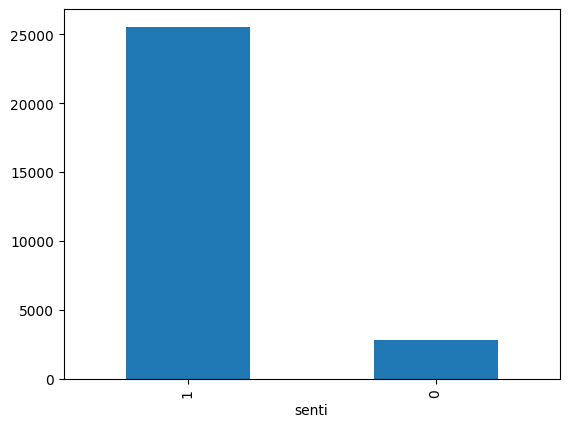

In [13]:
df["senti"].value_counts().plot.bar()

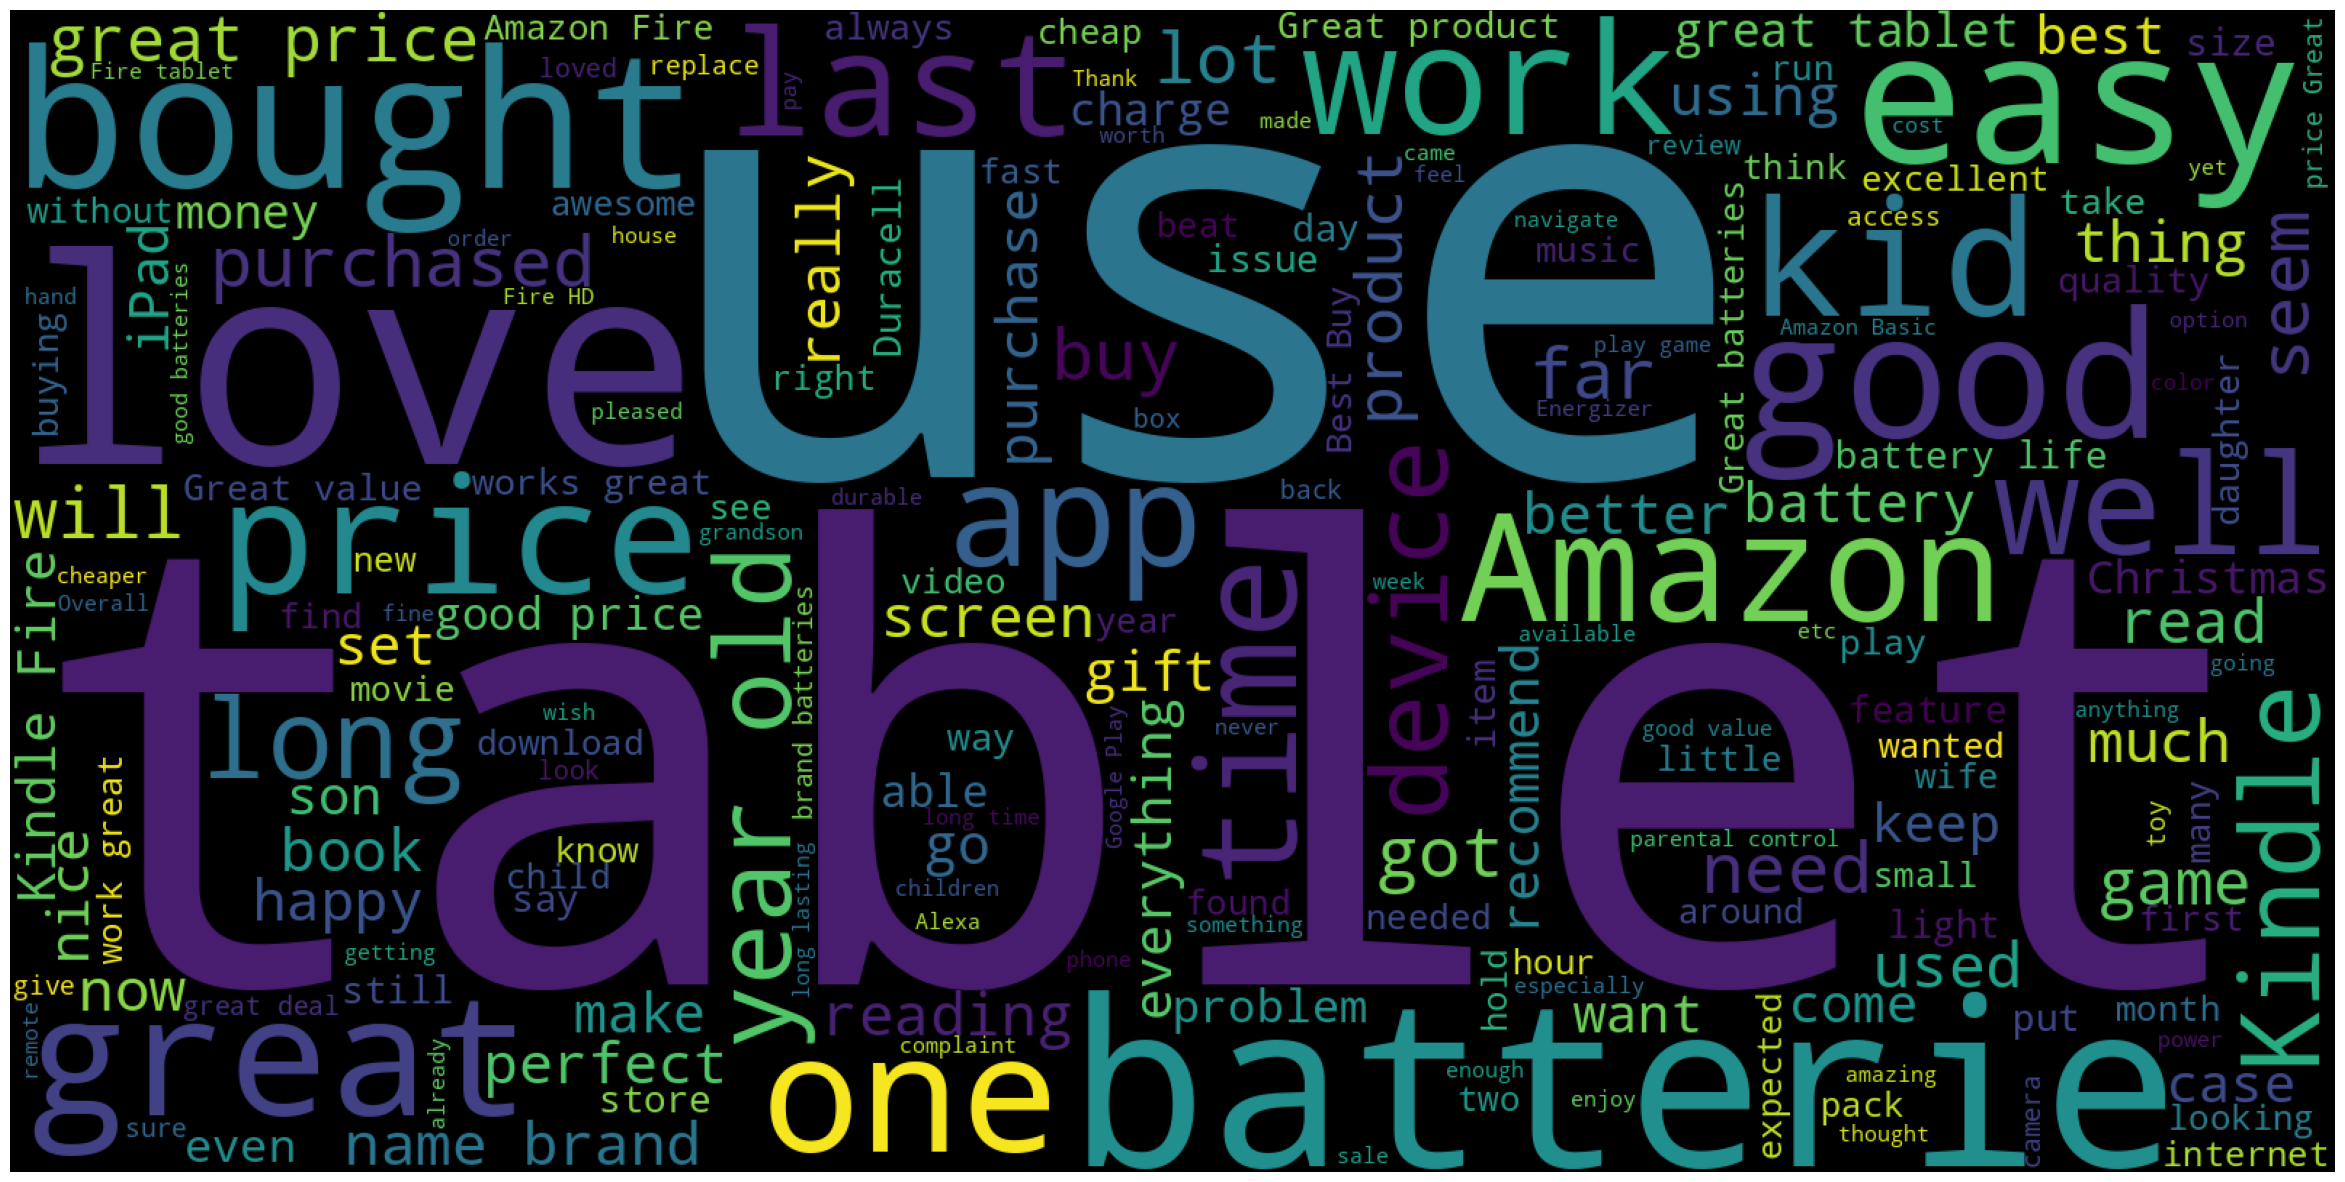

In [14]:
df['reviews.text'] = df['reviews.text'].astype(str)

from wordcloud import WordCloud

wc = WordCloud(background_color = 'black',
              width=1600,
              height=800).generate(' '.join(df['reviews.text']))

plt.figure(1, figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
cleanup_re = re.compile('[^a-z]+')
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    tokens = nltk.word_tokenize(sentence)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [19]:
X = df["reviews.text"]
y=df["reviews.rating"]

In [20]:
from sklearn.model_selection import train_test_split

#splitting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

#random_state is used to ensure that data splitting process is reproducible.
#that is, no matter how many times the code is run, you will get the same split of data each time

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(22665,) (5667,)
(22665,) (5667,)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(preprocessor=preprocess)

X_train_num = vect.fit_transform(X_train)

print(X_train_num.shape)

(22665, 8118)


In [22]:
#importing libraries

#library for generating pipleines
from sklearn.pipeline import Pipeline

#machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec

#for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [23]:
import mlflow
mlflow.set_experiment('my experiment')

<Experiment: artifact_location='file:///content/mlruns/761272645465474587', creation_time=1731823222257, experiment_id='761272645465474587', last_update_time=1731823222257, lifecycle_stage='active', name='my experiment', tags={}>

In [24]:

import joblib
from joblib import Memory
import os


#Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)


pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ],
    memory = memory)

}

In [25]:


param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 2500],
            'classifier__alpha': [1,10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 2500],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 2500],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight':['balanced']
        }
    ]
}

In [ ]:


best_models ={}

#running the pipeline
for algo in pipelines.keys():
    print('*' * 10, algo, '*' * 10)
    grid_search = GridSearchCV(estimator = pipelines[algo],
                              param_grid = param_grids[algo],
                              cv = 5,
                              scoring = 'accuracy',
                              return_train_score = True,
                              verbose = 1
                              )

    mlflow.sklearn.autolog(max_tuning_runs=None)

    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)

    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))

    best_models[algo] = grid_search.best_estimator_
    print()

********** naive_bayes **********


2024/11/17 06:31:00 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 36.7 s, sys: 1.04 s, total: 37.7 s
Wall time: 43.1 s
Train Score:  0.728788881535407
Test Score:  0.7356626080818776

********** decision_tree **********


2024/11/17 06:31:43 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


2024/11/17 06:33:54 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: user 2min 1s, sys: 527 ms, total: 2min 1s
Wall time: 2min 11s
Train Score:  0.7890580189719832
Test Score:  0.8048350097053114

********** logistic_regression **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

In [ ]:
import joblib
import os

from sklearn.metrics import f1_score

#to check if the directory exists, if not create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_dir = 'Predictive_Model'

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)

    joblib.dump(model, os.path.join(save_dir, f'{name}.pkl'))
    loaded_model = joblib.load(os.path.join(save_dir, f'{name}.pkl'))

    %time y_test_pred = loaded_model.predict(X_test)

    f1 = f1_score(y_test, y_test_pred, pos_label='Positive')

    print("F1 Score (Positive Class):", f1)
    print("Model Size:", os.path.getsize(os.path.join(save_dir, f'{name}.pkl')), "Bytes")